In [1]:
!pip install pycoingecko
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id = "bitcoin",vs_currency= "inr",days = "30")

In [5]:
!pip install plotly==5.6.0

     |████████████████████████████████| 27.7 MB 19 kB/s  eta 0:00:01    |▎                               | 286 kB 5.5 MB/s eta 0:00:05


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
#Explore data
df = pd.DataFrame(bitcoin_data["prices"],columns = ["Timestamp","Price"])
df["Date"] = pd.to_datetime(df["Timestamp"], unit = 'ms')
df

,Timestamp,Price,Date
0,1642870885598,2.612876e+06,2022-01-22 17:01:25.598
1,1642874429377,2.577309e+06,2022-01-22 18:00:29.377
2,1642878479406,2.569563e+06,2022-01-22 19:07:59.406
3,1642881707361,2.575156e+06,2022-01-22 20:01:47.361
4,1642885302767,2.639259e+06,2022-01-22 21:01:42.767
...,...,...,...
713,1645448418360,2.804558e+06,2022-02-21 13:00:18.360
714,1645452035308,2.810307e+06,2022-02-21 14:00:35.308
715,1645455666571,2.898950e+06,2022-02-21 15:01:06.571
716,1645459298034,2.896470e+06,2022-02-21 16:01:38.034


In [11]:
shape = df.shape
print("The dataset shape is {}.".format(shape))

The dataset shape is (718, 3).


In [28]:
df.dtypes

Timestamp             int64
Price               float64
Date         datetime64[ns]
dtype: object

In [12]:
df.describe()

,Timestamp,Price
count,7.180000e+02,7.180000e+02
mean,1.644167e+12,2.998185e+06
std,7.516533e+08,2.280793e+05
min,1.642871e+12,2.500810e+06
25%,1.643520e+12,2.802891e+06
50%,1.644161e+12,2.988159e+06
75%,1.644821e+12,3.214935e+06
max,1.645460e+12,3.417080e+06


In [15]:
#Group the data
candlestick_data = df.groupby(df.Date.dt.date).agg({'Price': ['min', 'max', 'first', 'last']})
candlestick_data

Price                                          
                     min           max         first          last
Date                                                              
2022-01-22  2.569563e+06  2.651616e+06  2.612876e+06  2.599902e+06
2022-01-23  2.590171e+06  2.684088e+06  2.618144e+06  2.647666e+06
2022-01-24  2.500810e+06  2.796246e+06  2.701844e+06  2.710620e+06
2022-01-25  2.682723e+06  2.793434e+06  2.744998e+06  2.753933e+06
2022-01-26  2.737212e+06  2.886792e+06  2.765522e+06  2.759419e+06
2022-01-27  2.675445e+06  2.783678e+06  2.776740e+06  2.781455e+06
2022-01-28  2.725554e+06  2.843139e+06  2.803574e+06  2.830731e+06
2022-01-29  2.815628e+06  2.888243e+06  2.839002e+06  2.864444e+06
2022-01-30  2.819927e+06  2.876795e+06  2.867473e+06  2.842385e+06
2022-01-31  2.770815e+06  2.876451e+06  2.850502e+06  2.869982e+06
2022-02-01  2.857417e+06  2.920790e+06  2.874540e+06  2.895048e+06
2022-02-02  2.760745e+06  2.900352e+06  2.900352e+06  2.784198e+06
2022-02-03  2.722461e+06  2.782761e+06  2.768512e+06  2.756516e+06
2022-02-04  2.769399e+06  3.044009e+06  2.769399e+06  3.039415e+06
2022-02-05  3.084028e+06  3.123051e+06  3.110800e+06  3.110023e+06
2022-02-06  3.089481e+06  3.117946e+06  3.097353e+06  3.113178e+06
2022-02-07  3.126759e+06  3.314759e+06  3.170468e+06  3.298614e+06
2022-02-08  3.215009e+06  3.359929e+06  3.278247e+06  3.298362e+06
2022-02-09  3.238854e+06  3.351180e+06  3.300386e+06  3.339275e+06
2022-02-10  3.281521e+06  3.417080e+06  3.320321e+06  3.318229e+06
2022-02-11  3.190309e+06  3.301102e+06  3.295611e+06  3.190309e+06
2022-02-12  3.175899e+06  3.246427e+06  3.210701e+06  3.194482e+06
2022-02-13  3.177907e+06  3.227867e+06  3.196279e+06  3.201448e+06
2022-02-14  3.158875e+06  3.233638e+06  3.188013e+06  3.233638e+06
2022-02-15  3.221763e+06  3.340269e+06  3.226825e+06  3.328370e+06
2022-02-16  3.268918e+06  3.350875e+06  3.350875e+06  3.305542e+06
2022-02-17  3.060773e+06  3.308066e+06  3.294813e+06  3.060773e+06
2022-02-18  2.973324e+06  3.073495e+06  3.045351e+06  2.990289e+06
2022-02-19  2.974106e+06  3.020406e+06  2.992865e+06  2.995017e+06
2022-02-20  2.857653e+06  3.001772e+06  3.001772e+06  2.896269e+06
2022-02-21  2.804558e+06  2.935415e+06  2.876428e+06  2.907507e+06

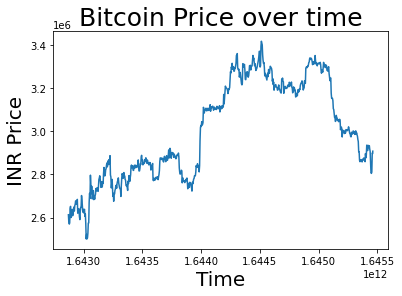

In [24]:
#Visualize data 
plt.plot(df["Timestamp"],df["Price"])
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("INR Price", size=20)
plt.show()

In [21]:
#Visualize data with candlestick chart.
fig = go.Figure(data=[go.Candlestick(x=candlestick_data.index, 
                                     open=candlestick_data['Price']['first'], 
                                     high=candlestick_data['Price']['max'],
                                     low=candlestick_data['Price']['min'], 
                                     close=candlestick_data['Price']['last'])])
fig.update_layout(
title="Bitcoin purchase information over the past 30 days", 
yaxis_title="Price",
xaxis_title= "Date")
fig.show()

In [31]:
#Prepare the dataset for training - Impute numerical data.
missing_counts = df.isna().sum().sort_values(ascending=False)
print(missing_counts)
#There is no missing data.

Timestamp    0
Price        0
Date         0
dtype: int64


In [30]:
#Preprocess data
df.groupby(df.Date.dt.date).agg({"Price":['min','max','first','last']}).reset_index().to_csv('candlestick_data.csv')
data = pd.read_csv('candlestick_data.csv')

In [38]:
data.columns

Index(['Date', 'Price', 'Price.1', 'Price.2', 'Price.3'], dtype='object')

In [41]:
data.rename(columns= {'Price':'min','Price.1':'max','Price.2':'first','Price.3':'last'})

,Date,min,max,first,last
1,2022-01-22,2569563.461635008,2651616.0691560027,2612876.434783477,2599901.5355814975
2,2022-01-23,2590171.065827259,2684088.0381438355,2618143.8383398005,2647666.2037756024
3,2022-01-24,2500809.7236750885,2796245.8643615926,2701844.49610217,2710620.455390377
4,2022-01-25,2682722.6384163178,2793434.2324742074,2744997.6018328657,2753933.036654546
5,2022-01-26,2737211.5747963246,2886791.861307747,2765521.626814255,2759418.6059680087
6,2022-01-27,2675445.395643013,2783678.3910792214,2776740.029637423,2781455.129730742
7,2022-01-28,2725553.8711030963,2843139.260754178,2803574.1422083415,2830730.725668691
8,2022-01-29,2815627.978636109,2888243.33929319,2839002.0985999433,2864443.525305977
9,2022-01-30,2819926.9247442875,2876795.039253561,2867472.6647903197,2842385.239570599
10,2022-01-31,2770814.55882728,2876451.0643107123,2850501.7813540245,2869982.001077789


In [42]:
x = data.iloc[:,1:4]
y = data.iloc[:,-1]

In [44]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 42)
model = LinearRegression()

In [47]:
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
print(y_predicted)

[3015313.79052399 3101125.37264928 3196718.17837441 3293460.44268201
 2844106.83979238 2821641.33946895 2899366.16236041]


In [50]:
#Evalute the model.
score = model.score(x_test, y_test)
print(score)

0.9775168859879132


In [58]:
mse = mean_squared_error(y_test,y_predicted)
print("Mean Square Error: ",mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error: ",rmse)
r2 = r2_score(y_test, y_predicted)
print("R2 Score : ", r2*100,"%")

Mean Square Error:  643995971.8517497
Root Mean Square Error:  25377.075715136085
R2 Score :  97.75168859879132 %
